<a href="https://colab.research.google.com/github/Innopolis-University-Adv-Statistics/Interactive-Statistics-Notebooks/blob/f-distribution/F_distribution_and_F_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Snedecor's T-distribution & T-test

***(Table of contents in Colab is on the left)***

---
## Setup


For this notebook we won't use any additional scientific packages apart from [Pandas](https://pandas.pydata.org/), [NumPy](https://numpy.org/), [SciPy](https://www.scipy.org/), [Altair](https://altair-viz.github.io/)

In [0]:
! pip install ipywidgets altair
! jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import pandas as pd
import numpy as np
from scipy.stats import f
import altair as alt

---
## Introduction


In this notebook we will cover and try to build intuition around Snedecor's F-distribution that, we will also see how F-test works and how [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) (ANalysis Of VAriance) relates to this topic.

We will see how one can use F-test to find out whether two normally distributed populations have the same variance or not ($H_{0}$ - variances are equal)

**Related topics**:
- $\chi^2$-distribution
- $t$-test and $t$-distribution
- Normal distribution, mean, variance
- $\Gamma$-distribution 


---
## F-distribution

### Definition

Let us start with defining what is F-distribution. From [Wikipedia](https://en.wikipedia.org/wiki/F-distribution) we have:
> A random variate of the F-distribution with parameters $d_{1}$ and $d_{2}$ arises as the ratio of two appropriately scaled chi-squared variates: 
$$ X = \frac{U_{1}/d_{1}}{U_{2}/d_{2}}  $$
Where $U_{1}$ and $U_{2}$ are chi-square distributed  with $d_{1}$ and $d_{2}$ degrees of freedom respectively, and $U_{1}$ and $U_{2}$ are independent

### Properties 

These are all of the mentioned properties on the wikipedia and we provide them since it may be useful for a learner to explore them to help to build intuition, because these properties refer to some other functions, distributions one could meet in statistics.

- If $ X \sim \chi^2_{d_1}$ and $ Y \sim \chi^2_{d_2}$ are independent, then $ \frac{X / d_1}{Y / d_2} \sim \mathrm{F}(d_1, d_2)$

- If $ X_k \sim \Gamma(\alpha_k,\beta_k)\,$ are independent, then $  \frac{\alpha_2\beta_1 X_1}{\alpha_1\beta_2 X_2} \sim \mathrm{F}(2\alpha_1, 2\alpha_2)$

- If $ X \sim \operatorname{Beta}(d_1/2,d_2/2)$ then $ \frac{d_2 X}{d_1(1-X)} \sim \operatorname{F}(d_1,d_2)$

- Equivalently, if $ X \sim F(d_1, d_2)$, then $ \frac{d_1 X/d_2}{1+d_1 X/d_2} \sim \operatorname{Beta}(d_1/2,d_2/2)$.

- If $ X \sim F(d_1, d_2)$, then $ \frac{d_1}{d_2}X$ has a beta prime distribution: $ \frac{d_1}{d_2}X \sim \operatorname{\beta^\prime}(\tfrac{d_1}{2},\tfrac{d_2}{2})$.

- If $ X \sim F(d_1, d_2)$ then $ Y = \lim_{d_2 \to \infty} d_1 X$ has the chi-squared distribution $ \chi^2_{d_1}$

- $ F(d_1, d_2)$ is equivalent to the scaled Hotelling's T-squared distribution $ \frac{d_2}{d_1(d_1+d_2-1)} \operatorname{T}^2 (d_1, d_1 +d_2-1) $.

- If $ X \sim F(d_1, d_2)$ then $ X^{-1} \sim F(d_2, d_1)$.

- If $ X\sim t_{(n)}$ — Student's t-distribution — then:
	- $ X^{2} \sim \operatorname{F}(1, n) $
	- $ X^{-2} \sim \operatorname{F}(n, 1) $

- F-distribution is a special case of type 6 Pearson distribution

- If $ X$ and $ Y$ are independent, with $ X,Y\sim \operatorname{Laplace}(μ,b) $ then
	- $  \frac{|X-\mu|}{|Y-\mu|} \sim \operatorname{F}(2,2) $

- If $ X\sim F(n,m)$ then $ \tfrac{\log{X}}{2} \sim \operatorname{FisherZ}(n,m)$ (Fisher's z-distribution)

- The noncentral F-distribution simplifies to the F-distribution if $ \lambda=0 $.

- The doubly noncentral F-distribution simplifies to the F-distribution if $ \lambda_1 = \lambda_2 = 0 $

- If $ \operatorname{Q}_X(p)$ is the quantile _p_ for $ X\sim F(d_1,d_2)$ and $ \operatorname{Q}_Y(1-p)$ is the quantile $ 1-p$ for $ Y\sim F(d_2,d_1)$, then
	- $ \operatorname{Q}_X(p)=\frac{1}{\operatorname{Q}_Y(1-p)}$

-  F-distribution is an instance of ratio distributions

### Data synthesis and basic exploration

For the sake of simplicity and ability to visualize the charts, we sythesize a few tens of thousands of points to plot.

In [0]:
columns = ['x', 'f(x)', 'n', 'd']
values = []

range_set = [i for i in range(1, 51, 2)]

for num in range_set:
    for den in range_set:
        for i in range(0, 100):
            x = i/20
            values.append([x, f.pdf(x, num, den), num, den])

data = pd.DataFrame(values, columns=columns)

The following code create an interactive chart that shows the F-distribution's PDF so you can adjust the sliders to see how the graph changes

In [104]:
alt.data_transformers.disable_max_rows()
scales = alt.selection_interval(bind='scales')

slider_n = alt.binding_range(min=1, max=50, step=2, name='numerator:')
select_n = alt.selection_single(name='n', fields=['n'], bind=slider_n, init={'n': 1})

slider_d = alt.binding_range(min=1, max=50, step=2, name='denominator:')
select_d = alt.selection_single(name='d', fields=['d'], bind=slider_d, init={'d': 1})

y_axis = alt.Y('f(x):Q', scale=alt.Scale(domain=(0, 2)))

alt.Chart(data).mark_line().encode(
    x='x:Q', y=y_axis
).add_selection(
    select_n, select_d, scales
).transform_filter(
    select_n & select_d
)

alt.Chart(...)

---
## F-test

### Definition

> Just as you would perform a `t-test` to determine if a sample mean (test group) came from another distribution (control group) with the same mean, an F-test can compare the means of various groups and determine if they are equal by looking at their variances. We can do this be checking the variations between the groups and within the groups. [Robert R.F. DeFilippi](https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0)



More formally, from [Wikipedia](https://en.wikipedia.org/wiki/F-test_of_equality_of_variances)

> Let $X_{1},...,X_{n}$ and $Y_{1},...,Y_{m}$ be independent and identically distributed samples from two normally distributed populations. The expected values for the two populations can be different, and the __hypothesis to be tested is that the variances are equal__. 

> Let $$ \overline{X} = \frac{1}{n}\sum_{i=1}^n X_i \text{  and  } \overline{Y} = \frac{1}{m}\sum_{i=1}^m Y_i $$
be the sample means.

> Let
$$ S_X^2 = \frac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{X}\right)^2\text{  and  }S_Y^2 = \frac{1}{m-1}\sum_{i=1}^m \left(Y_i - \overline{Y}\right)^2 $$
be the corrected sample variances.  

> Then the test statistic
$$ F_{cal} = \frac{S_X^2}{S_Y^2} $$
has an F-distribution with $n - 1$ and $m - 1$ degrees of freedom if the $H_{0}$ of equality of variances is true. Otherwise it follows an F-distribution scaled by the ratio of true variances. The $H_{0}$ is rejected if $F_{cal}$ is either too large or too small based on the desired alpha level (i.e., statistical significance).


**Important!**

As it is said in [this](https://stats.stackexchange.com/questions/67543/why-do-we-use-a-one-tailed-test-f-test-in-analysis-of-variance-anova)  excellent explanation on why and how to decide the kind (one/two tail) test to use, F-test is commonly used in 2 cases:
1. in ANOVA for testing equality of means 
2. in testing equality of variances

Please, also, check [this](https://stats.stackexchange.com/questions/210830/why-is-f-test-so-sensitive-for-the-assumption-of-normality) about F-test sensitivity to data normality

---
## Application example
(this example is based on the marvelous [Robert R.F. DeFilippi](https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0) post on F-test, but we will make it a bit shorter, since we have already covered F-distribution previously


**Confidence level - 95%**

### Problem description


Imagine, we have the well-known [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) that has 3 distinct types of iris flowers - classes. And we want to find out, whether, for example, the width of sepal can be a good/meaningful/statistically important predictor of the class of the flower.

Let's state our hypothesis. 

$H_{0}$: means of the three classes are equal (so we cannot use them as a useful predictor to distinguish classes). $ \bar{A} = \bar{B} = \bar{C} $ where A,B,C - the three classes of iris flowers.

$H_{A}$: at least one pair of these means of the three classes are different. $\bar{A} \neq \bar{B} \neq \bar{C }$ OR $\bar{A} \neq \bar{B}$ OR $\bar{A} \neq \bar{B}$ OR $\bar{B} \neq \bar{C}$.

![sepal iris](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)



In [105]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset('iris')['data']
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

As we know from the previous part of the notebook (the attached links also!), F-test is sensitive to the normality of the data, so first of all we will check: 
1. the data is normally distributed
2. the samples are independent
3. the population is homoscedastic (the variance of a sample stays the same for the whole sample)

Homoscedasticity 

![homoscedasticity](https://i.stack.imgur.com/RXQv9.png)

In [106]:
iris.groupby('Species')['Sepal.Width'].describe()

count   mean       std  min    25%  50%    75%  max
Species                                                        
setosa       50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

To test for normality let's use [Shapiro-Wilks](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) normality test. For this test (as for all the other tests as well) we will use Confidence Level of 95% (just because we want so) and for this test $H_{0}$: data is normally distributed

In [107]:
import scipy.stats as stats

CONFIDENCE_LEVEL = 0.95

for group_name, data in iris.groupby('Species')['Sepal.Width']:
    statistics, p_value = stats.shapiro(data)
    reject = "not reject" if 1 - p_value < CONFIDENCE_LEVEL else "reject"
    print(f"{group_name} p-value is {p_value}, {reject}")

setosa p-value is 0.2715264856815338, not reject
versicolor p-value is 0.33798879384994507, not reject
virginica p-value is 0.1809043288230896, not reject


It seems like each of the three classes in the dataset have the lengths of sepal to be normally distributed! Success! It's a sign that we can try to use F-test. But let's also check [Levene's](https://en.wikipedia.org/wiki/Levene%27s_test) normality test to be more sure about the results

In [108]:
data = [d for k, d in iris.groupby('Species')['Sepal.Width']]
statistics, p_value = stats.levene(*data)
reject = "not reject" if 1 - p_value < CONFIDENCE_LEVEL else "reject"
print(f"p-value is {p_value}, {reject}")

p-value is 0.5555178984739075, not reject


### Hypothesis test

The test itself, as in most machine learning tutorials (hello to you, `.fit()`, `.predict()`) is very simple to run using a library. 

Our test looks like this

$ \mathsf{F-statistic} = \frac{\text{variance between groups}}{\text{variance within groups}} $

Thus, number of degrees of freedom of the numerator = 3 (classes) - 1 and number of degrees of freedom of the denominator = 150 (total items in the dataset) - 3 (classes) = 147. Why we subtract number of classes from the number of items - we use formula for ANOVA, check _Summary Table_ [here](https://people.richland.edu/james/lecture/m170/ch13-1wy.html)

Please, do consider exploring mentioned functions documentation as scientific packages like `SciPy` tend to have interesting/useful information on the caveats and cornerstones of the tests/statistics/functions/etc

In [0]:
degree_freedom_numerator = 3 - 1
degree_freedom_denominator = 150 - 3

In [110]:
statistic, p_value = stats.f_oneway(*data)
reject = "not reject" if 1 - p_value < CONFIDENCE_LEVEL else "reject"
print(f"p-value is {p_value}, {reject}")

p-value is 4.492017133309115e-17, reject


### Results


As we have seen there ↑ , the p-value is very small, smaller, than our confidence interval allows, so we proudly reject our $H_{0}$ in favor of $H_{1}$ and we say that there is a statistically important difference of the means


Let's see where are the critical and the calculated values on the graph

Text(0.5, 1.0, 'F-Distribution dfn:2, dfd:147')

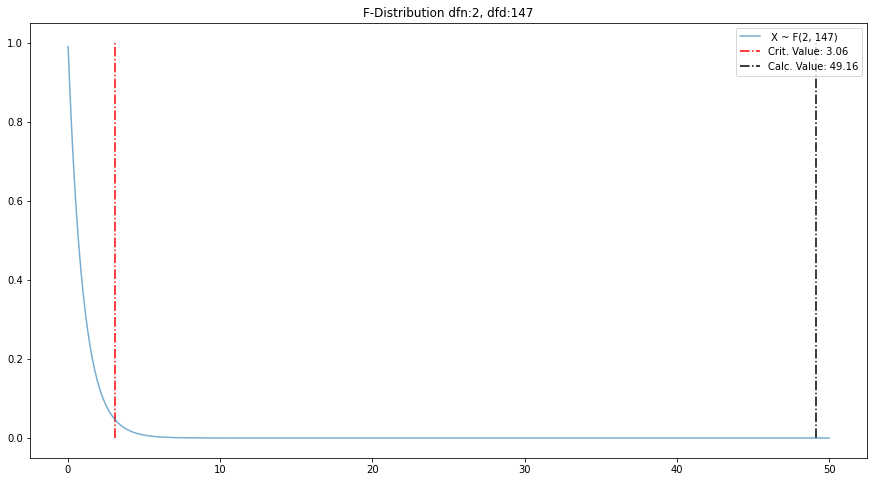

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

dfn, dfd = degree_freedom_numerator, degree_freedom_denominator
rejection_reg = f.ppf(q=CONFIDENCE_LEVEL, dfn=dfn, dfd=dfd)
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
x = np.linspace(f.ppf(0.01, dfn, dfd), 
                50, 1000)

plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, label=f' X ~ F({dfn}, {dfd})')
plt.vlines(rejection_reg, 0.0, 1.0, colors='r', linestyles="dashdot", label=f"Crit. Value: {rejection_reg:.2f}")
plt.vlines(statistic, 0.0, 1.0, linestyles="dashdot", label=f"Calc. Value: {statistic:.2f}")
plt.legend()
plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))

---
## Conclusion

### What we learned

- We have seen the definitions and one case of analysis of a real-world data (Iris dataset) using F-test to find whether the means of the widths of sipal of different classes are the same or different
- We mentioned the imporance of the normality of data
- We refered to the 2 cases when F-test is usually applied: to test a) equal means, b) equal variances, but in the example part we only considered ANOVA means equality


---
## References / Acknowledgements

The following is the list of resources that we strongly encourage you to read to recap, to learn and to master T-test

- "F-tests and ANOVAs — Examples with the Iris dataset" by Robert R.F. DeFilippi [link](https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0)
- "Why is F-test so sensitive for the assumption of normality?" by Glen_b [link](https://stats.stackexchange.com/questions/210830/why-is-f-test-so-sensitive-for-the-assumption-of-normality)
- "Why do we use a one-tailed test F-test in analysis of variance (ANOVA)?" by Glen_b [link](https://stats.stackexchange.com/questions/67543/why-do-we-use-a-one-tailed-test-f-test-in-analysis-of-variance-anova)
- "Stats: One-Wat ANOVA" - why one-tail, etc [link](https://people.richland.edu/james/lecture/m170/ch13-1wy.html)
- Normality tests: [Shapiro-Wilk's](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) and [Leven's test](https://en.wikipedia.org/wiki/Levene%27s_test)
